# Lab Report: Diabetes Prediction Using Support Vector Machine (SVM)

## 1. Objective
To build a machine learning model using Support Vector Machine (SVM) to predict whether a person has diabetes based on medical diagnostic features such as glucose levels, BMI, and age.

---

## 2. Dataset Description
The dataset contains several medical features, as shown below. The target variable `Outcome` indicates whether the person is diabetic (1) or not diabetic (0).

| Feature                   | Description                                              |
|---------------------------|----------------------------------------------------------|
| Pregnancies               | Number of pregnancies                                    |
| Glucose                   | Plasma glucose concentration (mg/dL)                    |
| BloodPressure             | Diastolic blood pressure (mm Hg)                        |
| SkinThickness             | Triceps skinfold thickness (mm)                         |
| Insulin                   | 2-Hour serum insulin (mu U/ml)                          |
| BMI                       | Body mass index (weight in kg/(height in m)^2)          |
| DiabetesPedigreeFunction  | Diabetes pedigree function (genetic risk)               |
| Age                       | Age of the person                                       |
| Outcome                   | Diabetes diagnosis outcome (0 = Non-diabetic, 1 = Diabetic) |

### Sample Data

| Pregnancies | Glucose | BloodPressure | SkinThickness | Insulin | BMI  | DiabetesPedigreeFunction | Age | Outcome |
|-------------|---------|---------------|---------------|---------|------|--------------------------|-----|---------|
| 6           | 148     | 72            | 35            | 0       | 33.6 | 0.627                    | 50  | 1       |
| 1           | 85      | 66            | 29            | 0       | 26.6 | 0.351                    | 31  | 0       |
| 8           | 183     | 64            | 0             | 0       | 23.3 | 0.672                    | 32  | 1       |
| 1           | 89      | 66            | 23            | 94      | 28.1 | 0.167                    | 21  | 0       |
| 0           | 137     | 40            | 35            | 168     | 43.1 | 2.288                    | 33  | 1       |

---



## 3. Steps of Implementation

---



### 3.1 Importing Necessary Libraries

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

### 3.2 Loading and Inspecting the Dataset

In [ ]:
diabetes_dataset = pd.read_csv('/content/diabetes.csv')

# Display first few rows
print("First few rows of the dataset:")
print(diabetes_dataset.head())

# Dataset statistical summary
print("\nStatistical Summary:")
print(diabetes_dataset.describe())

# Class distribution
print("\nClass distribution:")
print(diabetes_dataset['Outcome'].value_counts())

First few rows of the dataset:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Statistical Summary:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   3

### 3.3 Data Visualization

#### 3.3.1 Distribution of All Features

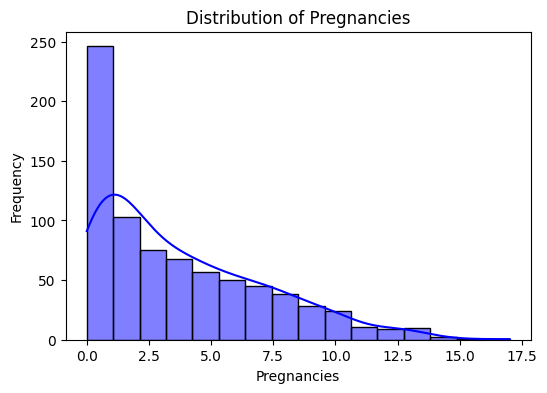

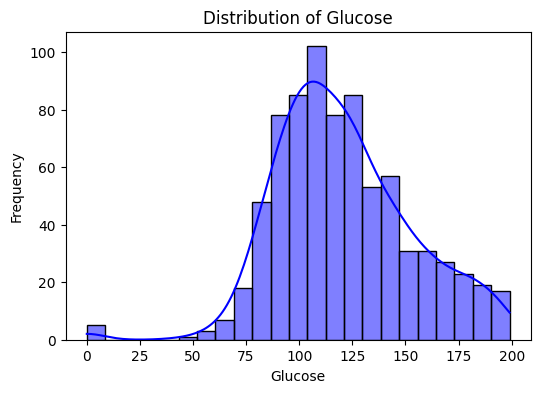

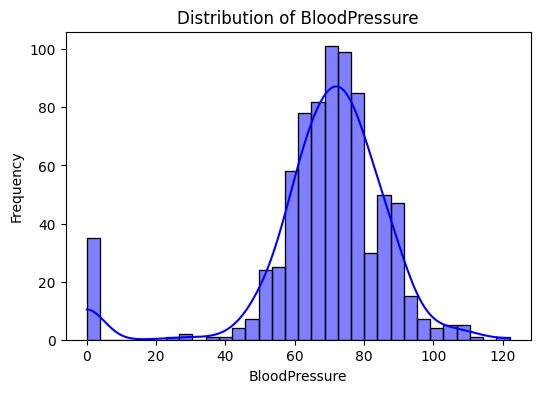

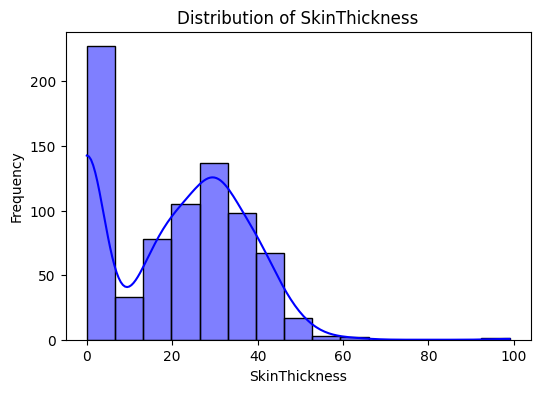

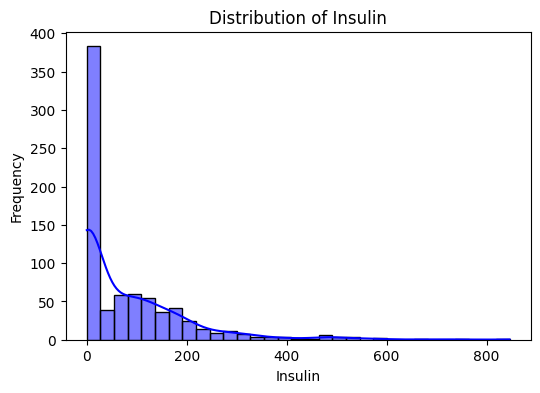

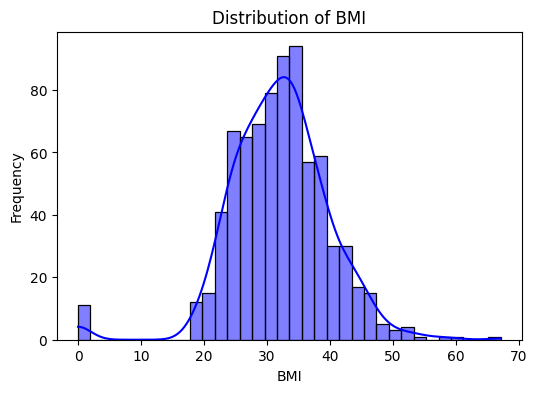

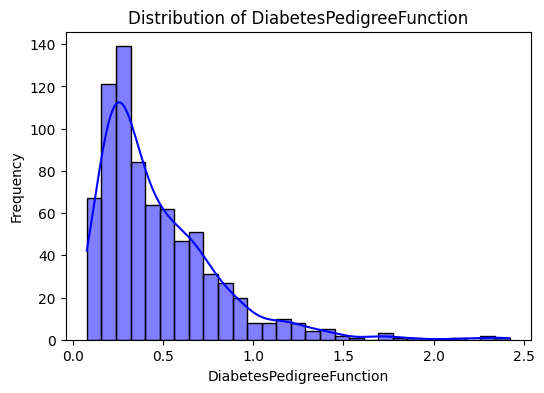

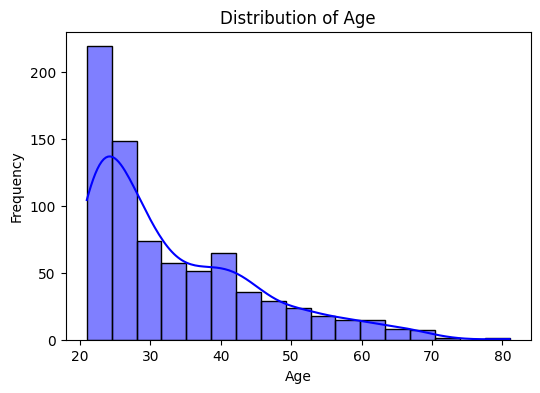

In [ ]:
# Visualizing distribution for all features
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
for feature in features:
    plt.figure(figsize=(6, 4))
    sns.histplot(diabetes_dataset[feature], kde=True, color='blue')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

### 3.4 Data Preprocessing

In [ ]:
# Separating features and target variable
X = diabetes_dataset.drop(columns='Outcome', axis=1)
Y = diabetes_dataset['Outcome']

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### 3.5 Model Training and Evaluation

In [ ]:
# Splitting data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, stratify=Y, random_state=2)

# Initializing and training the SVM model
classifier = svm.SVC(kernel='linear')
classifier.fit(X_train, Y_train)

# Evaluating the model on training data
train_predictions = classifier.predict(X_train)
train_accuracy = accuracy_score(train_predictions, Y_train)
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")

# Evaluating the model on test data
test_predictions = classifier.predict(X_test)
test_accuracy = accuracy_score(test_predictions, Y_test)
print(f"Testing Accuracy: {test_accuracy * 100:.2f}%")

Training Accuracy: 78.66%
Testing Accuracy: 77.27%



### 3.6 Confusion Matrix and Classification Report

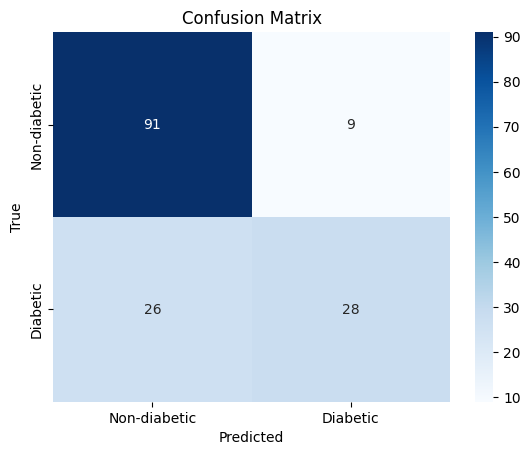

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.91      0.84       100
           1       0.76      0.52      0.62        54

    accuracy                           0.77       154
   macro avg       0.77      0.71      0.73       154
weighted avg       0.77      0.77      0.76       154



In [ ]:
# Confusion matrix
conf_matrix = confusion_matrix(Y_test, test_predictions)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-diabetic", "Diabetic"], yticklabels=["Non-diabetic", "Diabetic"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Classification report
print("Classification Report:")
print(classification_report(Y_test, test_predictions))

### 3.7 Predicting for New Input Data

In [ ]:
# New input data: Change this array with new data
new_data = np.array([[5, 120, 70, 22, 80, 30.5, 0.467, 40]])  # Example of new input

# Standardizing the input data using the pre-trained scaler
new_data_scaled = scaler.transform(new_data)

# Making a prediction using the trained classifier
prediction = classifier.predict(new_data_scaled)

# Displaying the prediction result
result = "Diabetic" if prediction[0] == 1 else "Non-diabetic"
print(f"Prediction for the new data: {result}")


Prediction for the new data: Non-diabetic


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
 new_data = np.array([[10, 168, 74, 0, 0, 38, 0.537, 34]])
new_data_scaled = scaler.transform(new_data)
prediction = classifier.predict(new_data_scaled)

# Displaying the prediction result
result = "Diabetic" if prediction[0] == 1 else "Non-diabetic"
print(f"Prediction for the new data: {result}")

Prediction for the new data: Diabetic


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
# Importing the required library
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Training the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=2)
dt_model.fit(X_train, Y_train)

# Predictions and evaluation
dt_train_predictions = dt_model.predict(X_train)
dt_test_predictions = dt_model.predict(X_test)

# Accuracy scores
dt_train_accuracy = accuracy_score(dt_train_predictions, Y_train)
dt_test_accuracy = accuracy_score(dt_test_predictions, Y_test)

print(f"Decision Tree Training Accuracy: {dt_train_accuracy:.2f}")
print(f"Decision Tree Testing Accuracy: {dt_test_accuracy:.2f}")


Decision Tree Training Accuracy: 1.00
Decision Tree Testing Accuracy: 0.69


In [ ]:
# Importing the required library
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Training the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=2)
rf_model.fit(X_train, Y_train)

# Predictions and evaluation
rf_train_predictions = rf_model.predict(X_train)
rf_test_predictions = rf_model.predict(X_test)

# Accuracy scores
rf_train_accuracy = accuracy_score(rf_train_predictions, Y_train)
rf_test_accuracy = accuracy_score(rf_test_predictions, Y_test)

print(f"Random Forest Training Accuracy: {rf_train_accuracy:.2f}")
print(f"Random Forest Testing Accuracy: {rf_test_accuracy:.2f}")


Random Forest Training Accuracy: 1.00
Random Forest Testing Accuracy: 0.73


In [ ]:
# Importing the required library
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Training the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)  # Using 5 neighbors as default
knn_model.fit(X_train, Y_train)

# Predictions and evaluation
knn_train_predictions = knn_model.predict(X_train)
knn_test_predictions = knn_model.predict(X_test)

# Accuracy scores
knn_train_accuracy = accuracy_score(knn_train_predictions, Y_train)
knn_test_accuracy = accuracy_score(knn_test_predictions, Y_test)

print(f"KNN Training Accuracy: {knn_train_accuracy:.2f}")
print(f"KNN Testing Accuracy: {knn_test_accuracy:.2f}")


KNN Training Accuracy: 0.83
KNN Testing Accuracy: 0.72


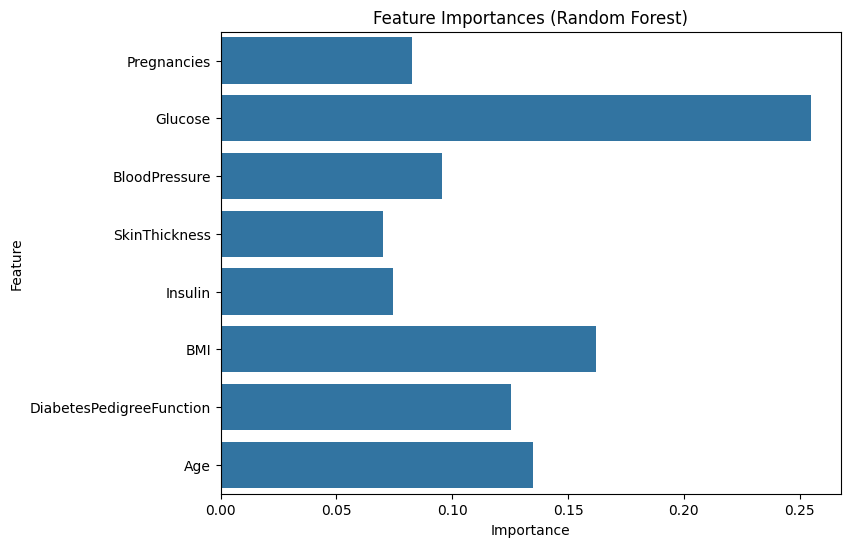

In [ ]:
# Feature importances from Random Forest
importances = rf_model.feature_importances_
plt.figure(figsize=(8, 6))
sns.barplot(x=importances, y=diabetes_dataset.drop(columns='Outcome').columns)
plt.title('Feature Importances (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


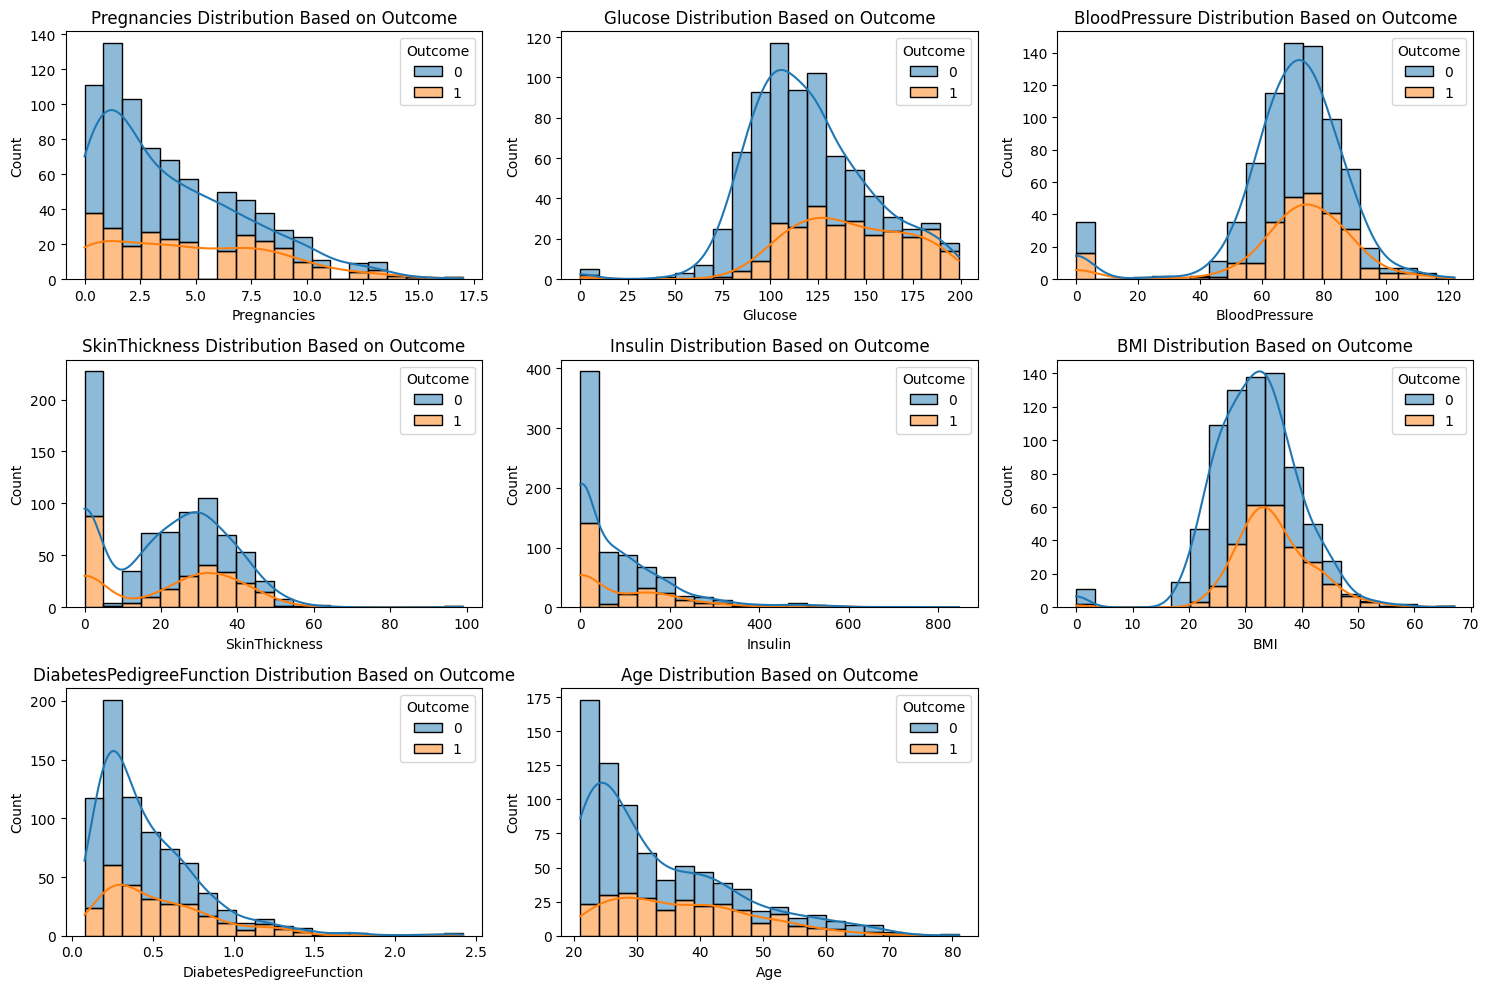

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the diabetes dataset
diabetes_dataset = pd.read_csv('/content/diabetes.csv')  # Adjust the path to your dataset

# List of all features to visualize (except 'Outcome' as it's the target variable)
features = diabetes_dataset.columns[:-1]  # All columns except 'Outcome'

# Setting the size of the plot
plt.figure(figsize=(15, 10))

# Loop over each feature to plot its distribution based on Outcome
for i, feature in enumerate(features):
    plt.subplot(3, 3, i+1)  # 3 rows, 3 columns of subplots
    sns.histplot(data=diabetes_dataset, x=feature, hue="Outcome", multiple="stack", kde=True, bins=20)
    plt.title(f'{feature} Distribution Based on Outcome')
    plt.xlabel(feature)
    plt.ylabel('Count')

plt.tight_layout()  # Adjust the spacing between subplots
plt.show()
